In [39]:
import pandas as pd
import numpy as np
from ltp import LTP
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import itertools
from gensim import corpora, models
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('items.csv', encoding='gbk')
#加载常用词
f=open('stopWord.txt', encoding='utf-8')
stopwords=[]
for line in f:
    stopwords.append(line.strip())
poslist = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']
content_frame = df['CONTENT']
ltp = LTP()

In [3]:
def prepare_data(df,stopwords):
    data =[]
    seg,hidden = ltp.seg([df])
    pos = ltp.pos(hidden)[0]
    for index,value in enumerate(seg[0]):
        if value not in stopwords and pos[index] in poslist:
            data.append(value)
    return data

In [49]:
# for i in content_frame:
#     prepare_data(i, stopwords)
corpus = []
for i in content_frame:
    a = prepare_data(i, stopwords)
    b = ' '.join(a)
    corpus.append(b)
#     for j in a:
#         corpus.append(j)

In [50]:
contvector = CountVectorizer(min_df=5)
wordmtx = contvector.fit_transform(corpus)
transformer = TfidfTransformer()
tf_idf = transformer.fit_transform(wordmtx)
n_topics = 3
ldamodel = LatentDirichletAllocation(n_components=n_topics)

In [51]:
ldamodel.fit(tf_idf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [52]:
def print_topic_words(model, features, top_n):
    for index, value in enumerate(model.components_):
        print('topic %d'%index)
        print(' '.join([features[i] for i in value.argsort()[:-top_n-1:-1]]))
    print()

In [53]:
top_n = 10
features = contvector.get_feature_names()
print_topic_words(ldamodel, features, top_n)

topic 0
手机 充电器 知道 包装 差评 摄像头 价格 耳机 问题 充电头
topic 1
屏幕 客服 手机 问题 不好 外观 外形 苹果 充电 激活
topic 2
降价 信号 保价 电池 时间 购买 差价 建议 不行 手机



In [58]:
def get_k(n_topics):
    contvector = CountVectorizer(min_df=5)
    wordmtx = contvector.fit_transform(corpus)
    transformer = TfidfTransformer()
    tf_idf = transformer.fit_transform(wordmtx)
    ldamodel = LatentDirichletAllocation(n_components=n_topics)
    ldamodel.fit(tf_idf)
    print_topic_words(ldamodel, contvector.get_feature_names(), 10)

In [63]:
for i in range(2,10):
    get_k(i)

topic 0
降价 手机 客服 苹果 不好 问题 时间 垃圾 充电 知道
topic 1
屏幕 手机 外观 信号 问题 外形 充电器 退货 收到 东西

topic 0
手机 垃圾 保价 苹果 价格 包装 激活 摄像头 耳机 退货
topic 1
降价 屏幕 外观 手机 外形 划痕 感觉 速度 充电 发热
topic 2
信号 问题 不好 手机 客服 时间 充电器 东西 服务 待机

topic 0
充电器 保价 包装 hellip 东西 耳机 手机 感觉 苹果 绿屏
topic 1
降价 屏幕 外观 外形 划痕 价格 差价 充电头 音效 手机
topic 2
信号 不好 手机 充电 速度 发热 拍照 摄像头 运行 掉价
topic 3
手机 客服 问题 服务 垃圾 时间 知道 态度 解决 质量

topic 0
降价 外观 外形 保价 差价 拍照 效果 划痕 瑕疵 保护
topic 1
时间 信号 手机 待机 速度 运行 摄像头 屏幕 死机 退货
topic 2
手机 屏幕 充电 包装 耳机 hellip 充电头 知道 特色 掉价
topic 3
客服 不好 问题 手机 服务 垃圾 态度 充电器 电池 质量
topic 4
手机 苹果 激活 问题 开机 购买 价格 出现 后悔 建议

topic 0
手机 问题 客服 屏幕 质量 服务 出现 感觉 划痕 解决
topic 1
保价 耳机 充电头 降价 特色 屏幕 辣鸡 充电 后悔 购买
topic 2
外观 外形 速度 运行 激活 拍照 效果 发票 手机 屏幕
topic 3
降价 价格 差价 时间 摄像头 待机 星期 保护 开心 手机
topic 4
手机 垃圾 不好 发热 hellip 差评 有点 发货 电池 反应
topic 5
信号 充电器 手机 死机 东西 声音 不行 电话 赠品 数据线

topic 0
降价 保价 差价 发热 摄像头 星期 数据线 赠品 特色 手机
topic 1
不好 问题 客服 服务 手机 hellip 态度 苹果 解决 质量
topic 2
手机 充电器 包装 充电 打开 客服 情况 建议 购买 破损
topic 3
手机 划痕 死机 垃圾 问题 感觉 屏幕 收到 开机 退货
topic 4
外观 外形 速度 拍照 运行 东西 掉价 效果 发票 绿屏
topic 5
充电头 手

In [11]:
# n_topics = range(1, 100, 5)
# perplexityLst = [1.0]*len(n_topics)

# #训练LDA并打印训练时间
# lda_models = []
# for idx, n_topic in enumerate(n_topics):
#     lda = LatentDirichletAllocation(n_components=n_topic,
#                                     max_iter=20,
#                                     learning_method='batch',
#                                     evaluate_every=200,
# #                                    perp_tol=0.1, #default                                       
# #                                    doc_topic_prior=1/n_topic, #default
# #                                    topic_word_prior=1/n_topic, #default
#                                     verbose=0)
#     new_lda = lda.fit(tf_idf)
#     perplexityLst[idx] = new_lda.perplexity(tf_idf)
#     lda_models.append(lda)
#     print("of Topic: %d, " % n_topics[idx])
#     print(" N_iter %d, " % ( lda.n_iter_))
#     print("Perplexity Score %0.3f" % perplexityLst[idx])

# #打印最佳模型
# best_index = perplexityLst.index(min(perplexityLst))
# best_n_topic = n_topics[best_index]
# best_model = lda_models[best_index]
# print("Best  of Topic: ", best_n_topic)

of Topic: 1, 
 N_iter 20, 
Perplexity Score 97.986
of Topic: 6, 
 N_iter 20, 
Perplexity Score 195.918
of Topic: 11, 
 N_iter 20, 
Perplexity Score 264.946
of Topic: 16, 
 N_iter 20, 
Perplexity Score 325.179
of Topic: 21, 
 N_iter 20, 
Perplexity Score 356.825
of Topic: 26, 
 N_iter 20, 
Perplexity Score 410.628
of Topic: 31, 
 N_iter 20, 
Perplexity Score 489.326
of Topic: 36, 
 N_iter 20, 
Perplexity Score 497.033
of Topic: 41, 
 N_iter 20, 
Perplexity Score 567.982
of Topic: 46, 
 N_iter 20, 
Perplexity Score 592.411
of Topic: 51, 
 N_iter 20, 
Perplexity Score 647.805
of Topic: 56, 
 N_iter 20, 
Perplexity Score 701.816
of Topic: 61, 
 N_iter 20, 
Perplexity Score 715.302
of Topic: 66, 
 N_iter 20, 
Perplexity Score 760.015
of Topic: 71, 
 N_iter 20, 
Perplexity Score 832.452
of Topic: 76, 
 N_iter 20, 
Perplexity Score 817.363
of Topic: 81, 
 N_iter 20, 
Perplexity Score 1064.808
of Topic: 86, 
 N_iter 20, 
Perplexity Score 1009.340
of Topic: 91, 
 N_iter 20, 
Perplexity Score 98

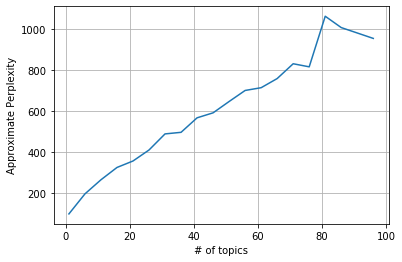

In [12]:
# import matplotlib.pyplot as plt
# #绘制不同主题数perplexity的不同
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(n_topics, perplexityLst)
# ax.set_xlabel("# of topics")
# ax.set_ylabel("Approximate Perplexity")
# plt.grid(True)
# plt.show()


In [29]:
neg_dict=corpora.Dictionary([ [i] for i in corpus])

In [33]:
neg_corpus=[ neg_dict.doc2bow(j) for j in [ [i] for i in corpus] ]

In [34]:
#构造主题数寻优函数

def cos(vector1,vector2):
    '''
    函数功能：余玄相似度函数
    '''
    dot_product=0.0
    normA=0.0
    normB=0.0
    for a,b in zip(vector1,vector2):
        dot_product +=a*b
        normA +=a**2
        normB +=b**2
    if normA==0.0 or normB==0.0:
        return None
    else:
        return ( dot_product/((normA*normB)**0.5) )

In [35]:
#主题数寻优
#这个函数可以重复调用，解决其他项目的问题

def LDA_k(x_corpus,x_dict):
    '''
    函数功能：
    '''
    #初始化平均余玄相似度
    mean_similarity=[]
    mean_similarity.append(1)
    
    #循环生成主题并计算主题间相似度
    for i in np.arange(2,11):
        lda=models.LdaModel(x_corpus,num_topics=i,id2word=x_dict) #LDA模型训练
        
        for j in np.arange(i):
            term=lda.show_topics(num_words=50)
        
        #提取各主题词
        top_word=[] #shape=(i,50)
        for k in np.arange(i):
            top_word.append( [''.join(re.findall('"(.*)"',i)) for i in term[k][1].split('+')]) #列出所有词
        
        #构造词频向量
        word=sum(top_word,[]) #列车所有词
        unique_word=set(word) #去重
        
        #构造主题词列表，行表示主题号，列表示各主题词
        mat=[] #shape=(i,len(unique_word))
        for j in np.arange(i):
            top_w=top_word[j]
            mat.append( tuple([ top_w.count(k) for k in unique_word ])) #统计list中元素的频次，返回元组
        
        #两两组合。方法一
        p=list(itertools.permutations(list(np.arange(i)),2)) #返回可迭代对象的所有数学全排列方式。
        y=len(p) # y=i*(i-1)
        top_similarity=[0]
        for w in np.arange(y):
            vector1=mat[p[w][0]]
            vector2=mat[p[w][1]]
            top_similarity.append(cos(vector1,vector2))

#        #两两组合，方法二
#        for x in range(i-1):
#            for y in range(x,i):
            
        #计算平均余玄相似度
        mean_similarity.append(sum(top_similarity)/ y)
    return mean_similarity

In [40]:
pos_k=LDA_k(neg_corpus,neg_dict)

In [41]:
pos_k

[1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005000000000000001,
 0.011111111111111113]

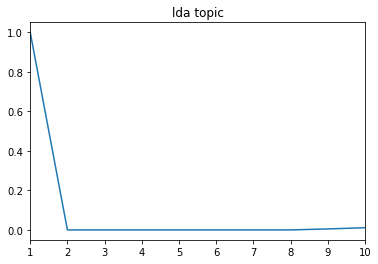

In [44]:
pd.Series(pos_k,index=range(1,11)).plot()
plt.title('lda topic')
plt.show()

In [47]:
neg_lda=models.LdaModel(neg_corpus,num_topics=9,id2word=neg_dict)

In [48]:
neg_lda.print_topics(num_topics=10)

[(0,
  '0.155*"差" + 0.072*"知道" + 0.066*"激活" + 0.061*"发" + 0.056*"时间" + 0.037*"电话" + 0.035*"电池" + 0.032*"理由" + 0.025*"严重" + 0.024*"系统"'),
 (1,
  '0.132*"退" + 0.092*"售" + 0.057*"送" + 0.048*"信号" + 0.041*"质量" + 0.038*"店" + 0.036*"钱" + 0.036*"建议" + 0.032*"掉" + 0.030*"开机"'),
 (2,
  '0.159*"客服" + 0.114*"太" + 0.089*"垃圾" + 0.065*"降价" + 0.048*"新" + 0.048*"月" + 0.045*"服务" + 0.035*"解决" + 0.031*"待机" + 0.019*"手"'),
 (3,
  '0.051*"态度" + 0.048*"卡" + 0.046*"问" + 0.044*"出现" + 0.042*"感觉" + 0.040*"联系" + 0.038*"充电" + 0.035*"只" + 0.035*"最" + 0.034*"失灵"'),
 (4,
  '0.395*"买" + 0.085*"苹果" + 0.063*"货" + 0.059*"小" + 0.056*"真" + 0.030*"一直" + 0.017*"降" + 0.014*"希望" + 0.014*"回" + 0.012*"差劲"'),
 (5,
  '0.118*"好" + 0.076*"想" + 0.072*"差评" + 0.054*"不好" + 0.047*"显示" + 0.046*"电" + 0.040*"购物" + 0.036*"发热" + 0.035*"产品" + 0.033*"回来"'),
 (6,
  '0.275*"手机" + 0.082*"换" + 0.077*"屏幕" + 0.049*"检测" + 0.034*"无" + 0.033*"收到" + 0.031*"开" + 0.030*"使用" + 0.022*"无法" + 0.020*"特色"'),
 (7,
  '0.059*"拆" + 0.057*"东西" + 0.052*"外观" + 0.051*"包装